# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [2]:
path = r'/Users/docopeland/Documents/data analysis/career foundry/06 Open Data'

In [3]:
wdi = pd.read_pickle(os.path.join(path,'data','prepared data','wdi_short.pkl'))

# Explore Relationships

In [4]:
wdi.columns

Index(['Country Name', 'year', 'CPI human resources', 'CPIA gender equality',
       'CPIA social protection', 'employers', 'management', 'fertility rate',
       'intentional homicides', 'labor force', 'literacy rate', 'poverty gap',
       'parliment seats', 'unpaid domestic', 'gender parity index',
       'primary enrollment', 'teenage mothers', 'married by 18'],
      dtype='object', name='Indicator Name')

In [5]:
#going to create a scatterplot for the different columns as the x and labor force for the y

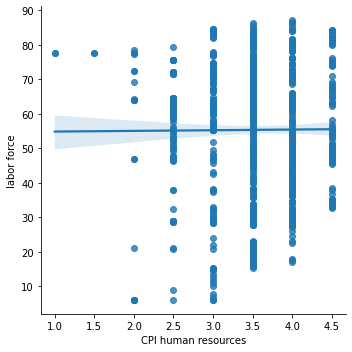

In [6]:
#scatter plot for labor force and CPI human resources
sns.lmplot(x = 'CPI human resources', y = 'labor force', data = wdi)

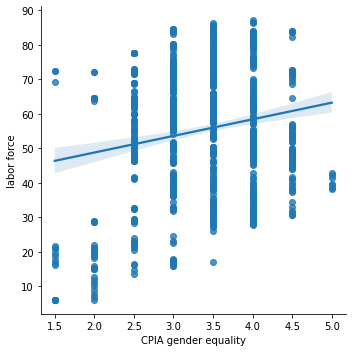

In [7]:
#scatter plot for labor force and CPIA gender equality
sns.lmplot(x = 'CPIA gender equality', y = 'labor force', data = wdi)

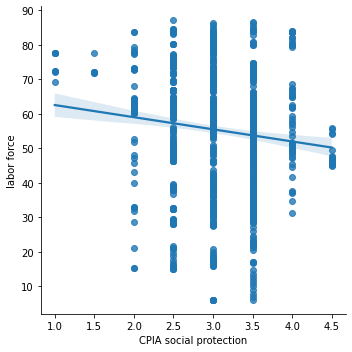

In [8]:
#scatter plot for labor force and CPIA social protection
sns.lmplot(x = 'CPIA social protection', y = 'labor force', data = wdi)

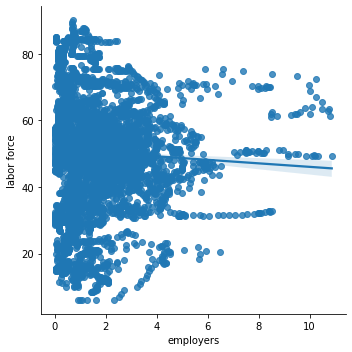

In [9]:
#scatter plot for labor force and employers
sns.lmplot(x = 'employers', y = 'labor force', data = wdi)

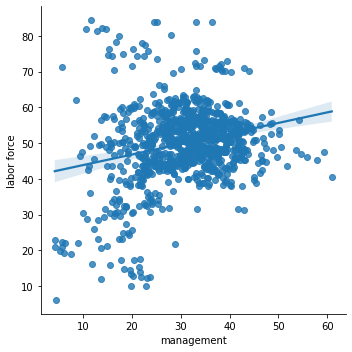

In [10]:
#scatter plot for labor force and management
sns.lmplot(x = 'management', y = 'labor force', data = wdi)

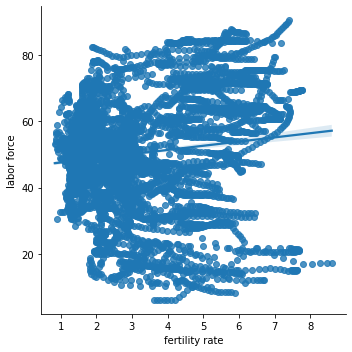

In [11]:
#scatter plot for labor force and fertility rate
sns.lmplot(x = 'fertility rate', y = 'labor force', data = wdi)

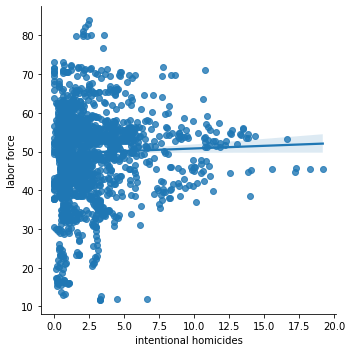

In [12]:
#scatter plot for labor force and intentional homicides
sns.lmplot(x = 'intentional homicides', y = 'labor force', data = wdi)

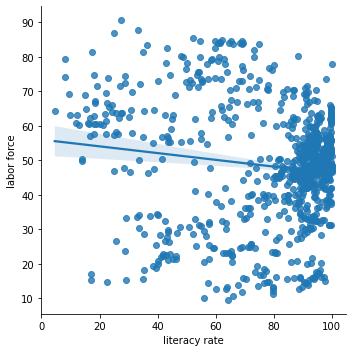

In [13]:
#scatter plot for labor force and literacy rate
sns.lmplot(x = 'literacy rate', y = 'labor force', data = wdi)

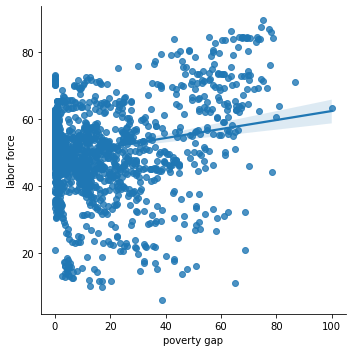

In [14]:
#scatter plot for labor force and poverty gap
sns.lmplot(x = 'poverty gap', y = 'labor force', data = wdi)

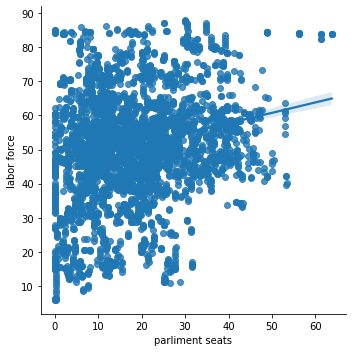

In [15]:
#scatter plot for labor force and parliament seats
sns.lmplot(x = 'parliment seats', y = 'labor force', data = wdi)

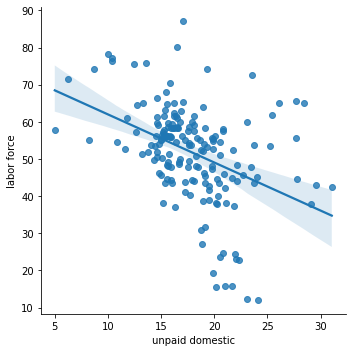

In [16]:
#scatter plot for labor force and unpaid domestic
sns.lmplot(x = 'unpaid domestic', y = 'labor force', data = wdi)

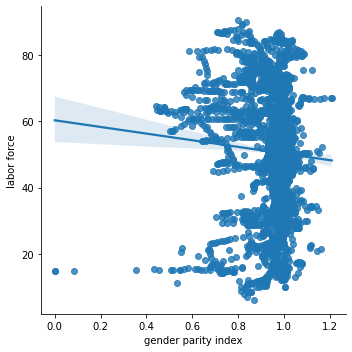

In [17]:
#scatter plot for labor force and gender parity index
sns.lmplot(x = 'gender parity index', y = 'labor force', data = wdi)

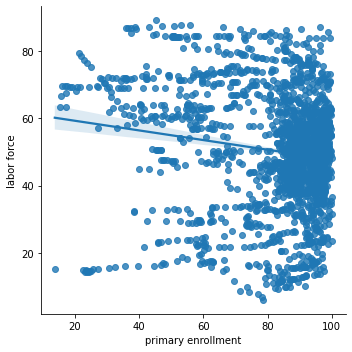

In [18]:
#scatter plot for labor force and primary enrollment
sns.lmplot(x = 'primary enrollment', y = 'labor force', data = wdi)

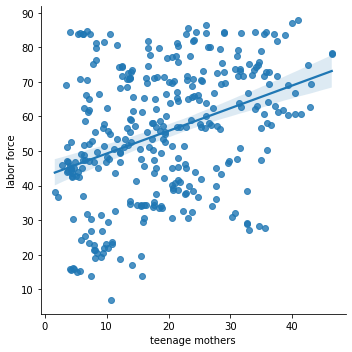

In [19]:
#scatter plot for labor force and teenage mothers
sns.lmplot(x = 'teenage mothers', y = 'labor force', data = wdi)

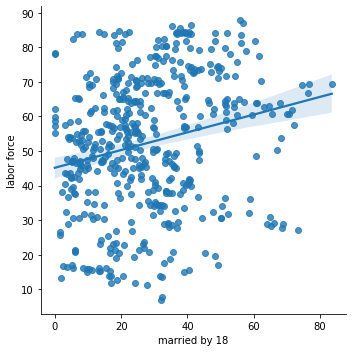

In [20]:
#scatter plot for labor force and married by 18
sns.lmplot(x = 'married by 18', y = 'labor force', data = wdi)

In [23]:
#i think unpaid domestic vs labor force was the best so i'll do the regression based on that one
#Hypothesis: as unpaid domestic labor increases, the labor force will decrease

In [27]:
wdi[['unpaid domestic','teenage mothers']].null().sum()

Indicator Name
unpaid domestic    177
teenage mothers    340
dtype: int64

In [31]:
wdiReg = wdi[wdi['unpaid domestic'].notnull()]

In [32]:
wdiReg

Indicator Name,Country Name,year,CPI human resources,CPIA gender equality,CPIA social protection,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
113,Albania,2011.0,NaN,NaN,NaN,1.15,NaN,1.673,1.531682,52.445999,95.691483,NaN,15.714286,21.73611,1.01557,88.24009,NaN,NaN
176,Algeria,2012.0,NaN,NaN,NaN,1.68,NaN,2.952,0.280894,15.823000,NaN,NaN,31.601732,21.66667,0.94445,NaN,NaN,NaN
479,Argentina,2005.0,NaN,NaN,NaN,2.26,26.260000,2.416,NaN,49.279999,NaN,9.8,36.186770,16.73611,0.99062,NaN,NaN,NaN
484,Argentina,2010.0,NaN,NaN,NaN,2.91,32.139999,2.346,NaN,47.875000,98.928070,4.8,38.521401,17.50000,0.98741,NaN,NaN,NaN
487,Argentina,2013.0,NaN,NaN,NaN,2.45,36.490002,2.322,NaN,47.826000,99.091209,3.4,36.575875,23.41864,0.99157,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12783,United States,2019.0,NaN,NaN,NaN,1.61,40.849998,1.706,NaN,56.596001,NaN,1.0,23.433875,15.33333,1.00705,NaN,NaN,NaN
12833,Uruguay,2007.0,NaN,NaN,NaN,2.91,22.120001,2.048,1.854312,53.526001,98.241928,3.8,12.121212,25.20833,0.97121,98.29781,NaN,NaN
12839,Uruguay,2013.0,NaN,NaN,NaN,2.85,34.180000,2.004,3.076126,55.377998,98.636429,1.2,12.121212,19.87475,0.97447,NaN,NaN,24.626692
13198,West Bank and Gaza,2000.0,NaN,NaN,NaN,0.71,23.110001,5.383,NaN,12.344000,NaN,NaN,NaN,23.12500,0.99922,87.94008,NaN,NaN


In [25]:
#reshape the values into arrays
x = wdiReg['unpaid domestic'].values.reshape(-1,1)
y = wdiReg['labor force'].values.reshape(-1,1)

In [27]:
#split data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [28]:
#create a linear regression object
reg = LinearRegression()

In [29]:
#fit the reg object onto the training set
reg.fit(xTrain,yTrain)

LinearRegression()

In [30]:
yPredict = reg.predict(xTest)

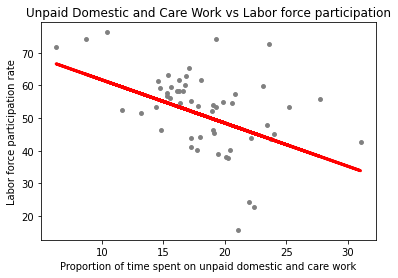

In [31]:
plot_test = plt
plot_test.scatter(xTest, yTest, color='gray', s = 15)
plot_test.plot(xTest, yPredict, color='red', linewidth =3)
plot_test.title('Unpaid Domestic and Care Work vs Labor force participation')
plot_test.xlabel('Proportion of time spent on unpaid domestic and care work')
plot_test.ylabel('Labor force participation rate')
plot_test.show()

In [32]:
#the line only fits the data decently well. there are so many points that are far away from the line though

In [33]:
#calculate model statistics
mse = mean_squared_error(yTest,yPredict)
r2 = r2_score(yTest,yPredict)

In [34]:
#print model statistics
print('Slope:' ,reg.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[-1.32185148]]
Mean squared error:  119.81922674375727
R2 score:  0.19001306426771902


In [35]:
#create a dataframe to show the difference
df = pd.DataFrame({'Actual':yTest.flatten(),'Predicted':yPredict.flatten()})
df.head(30)

,Actual,Predicted
0,40.255001,51.439341
1,24.427000,45.917412
2,54.548000,47.753305
3,38.901001,49.171427
4,72.551003,43.781472
5,44.313000,51.195300
6,57.478001,47.386134
7,58.428001,53.444616
8,53.244999,49.424482
9,71.628998,66.607163


In [ ]:
#it had a large MSE and a low r-squared, so the line does not fit the data well. Even without the r-squared and MSE,
#you can see it doesn't fit too well when you look at the yTest vs yPredict. 